In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [2]:
TRAIN_TEST_SPLIT = 0.95
CV = False

In [25]:
data = pd.read_csv('1h_3.csv')
#data = pd.read_csv('1h_model_data_pi.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [26]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data = data.iloc[:1074,:]

In [27]:
data

,temp_pi_t0,hum_pi_t0,PM1_pi_t0,PM2.5_pi_t0,PM10_pi_t0,temp_pi_t1,hum_pi_t1,PM1_pi_t1,PM2.5_pi_t1,PM10_pi_t1,...,PM10_pi_t4,temp_pi_t5,hum_pi_t5,PM1_pi_t5,PM2.5_pi_t5,PM10_pi_t5,PM2.5_pi,PM10_pi,hour,loc
0,2.200000,67.791667,7.280000,14.491667,21.935833,2.458333,66.141667,6.643333,14.654167,23.088333,...,14.282500,25.128571,36.428571,4.015714,9.323571,14.962143,11.823333,17.340833,21.0,0.0
1,2.050000,71.791667,8.087500,16.170000,24.518333,2.075000,69.941667,6.376667,11.823333,17.340833,...,28.408333,6.480000,49.986667,5.054000,11.749333,18.859333,13.952500,21.710833,23.0,0.0
2,1.758333,69.583333,5.843333,10.430833,15.020833,1.983333,69.816667,6.544167,13.952500,21.710833,...,21.935833,2.458333,66.141667,6.643333,14.654167,23.088333,7.693333,11.190000,1.0,0.0
3,1.100000,71.375000,6.135833,12.108333,18.262500,1.516667,70.291667,4.224167,7.693333,11.190000,...,24.518333,2.075000,69.941667,6.376667,11.823333,17.340833,13.358333,20.365833,3.0,0.0
4,0.366667,74.691667,6.256667,12.628333,19.224167,0.725000,73.600000,6.597500,13.358333,20.365833,...,15.020833,1.983333,69.816667,6.544167,13.952500,21.710833,7.764167,10.910833,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,18.481818,37.609091,2.420909,4.647273,6.926364,19.633333,36.091667,3.625000,9.433333,15.688333,...,9.993333,20.520000,34.980000,2.596000,5.820000,9.228000,8.526667,13.664167,16.0,1.0
536,14.775000,64.150000,6.013333,12.902500,20.120833,16.550000,50.075000,3.684167,8.526667,13.664167,...,9.036000,19.981818,35.990909,3.381818,7.029091,10.828182,6.644167,9.780833,18.0,1.0
537,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
538,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [6]:
#Only location B
#data = data[data['loc'] == 1.0]

In [7]:
data

,temp_pi_t0,hum_pi_t0,PM1_pi_t0,PM2.5_pi_t0,PM10_pi_t0,temp_pi_t1,hum_pi_t1,PM1_pi_t1,PM2.5_pi_t1,PM10_pi_t1,...,PM10_pi_t4,temp_pi_t5,hum_pi_t5,PM1_pi_t5,PM2.5_pi_t5,PM10_pi_t5,PM2.5_pi,PM10_pi,hour,loc
0,2.200000,67.791667,7.280000,14.491667,21.935833,2.458333,66.141667,6.643333,14.654167,23.088333,...,14.282500,25.128571,36.428571,4.015714,9.323571,14.962143,11.823333,17.340833,22.0,0.0
1,2.075000,69.941667,6.376667,11.823333,17.340833,2.200000,67.791667,7.280000,14.491667,21.935833,...,18.859333,24.350000,34.175000,2.905000,8.352500,14.282500,16.170000,24.518333,23.0,0.0
2,2.050000,71.791667,8.087500,16.170000,24.518333,2.075000,69.941667,6.376667,11.823333,17.340833,...,28.408333,6.480000,49.986667,5.054000,11.749333,18.859333,13.952500,21.710833,0.0,0.0
3,1.983333,69.816667,6.544167,13.952500,21.710833,2.050000,71.791667,8.087500,16.170000,24.518333,...,23.088333,3.066667,61.100000,7.343333,17.540833,28.408333,10.430833,15.020833,1.0,0.0
4,1.758333,69.583333,5.843333,10.430833,15.020833,1.983333,69.816667,6.544167,13.952500,21.710833,...,21.935833,2.458333,66.141667,6.643333,14.654167,23.088333,7.693333,11.190000,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,19.633333,36.091667,3.625000,9.433333,15.688333,20.070000,36.200000,2.704000,5.797000,9.036000,...,9.228000,21.416667,33.466667,2.684167,5.858333,9.194167,4.647273,6.926364,16.0,1.0
1070,18.481818,37.609091,2.420909,4.647273,6.926364,19.633333,36.091667,3.625000,9.433333,15.688333,...,9.993333,20.520000,34.980000,2.596000,5.820000,9.228000,8.526667,13.664167,17.0,1.0
1071,16.550000,50.075000,3.684167,8.526667,13.664167,18.481818,37.609091,2.420909,4.647273,6.926364,...,10.828182,20.108333,35.866667,2.847500,6.325833,9.993333,12.902500,20.120833,18.0,1.0
1072,14.775000,64.150000,6.013333,12.902500,20.120833,16.550000,50.075000,3.684167,8.526667,13.664167,...,9.036000,19.981818,35.990909,3.381818,7.029091,10.828182,6.644167,9.780833,19.0,1.0


In [8]:
labels = ['PM2.5_pi', 'PM10_pi']

In [9]:
X = data.drop(labels, axis=1)
y1 = data[labels[0]]
y2 = data[labels[1]]

In [10]:
parameters = {'learning_rate':[0.01, 0.1, 1], 
              'n_estimators':[100, 500, 1000], 
              'max_depth':[2, 3, 4], 
              'colsample_bytree':[0.1, 0.5, 1]}

In [11]:
xgb = XGBRegressor(n_jobs=-1)

In [12]:
search1 = GridSearchCV(xgb, parameters)
search2 = GridSearchCV(xgb, parameters)

In [13]:
if CV:
    search1.fit(X, y1)
    search2.fit(X, y2)
    params1 = search1.best_params_
    params2 = search2.best_params_
else:
    params1 = {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500}
    params2 = {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

In [14]:
print("Params 1: ", params1)
print("Params 2: ", params2)

Params 1:  {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500}
Params 2:  {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}


In [15]:
n = int(TRAIN_TEST_SPLIT*data.shape[0])

X_train = data.iloc[:n,:]
X_test = data.iloc[n:,:]

y_train1 = X_train[labels[0]]
y_train2 = X_train[labels[1]]

y_true1 = X_test[labels[0]]
y_true2 = X_test[labels[1]]

X_train = X_train.drop(labels, axis=1)
X_test = X_test.drop(labels, axis=1)

In [16]:
model1 = XGBRegressor(**params1)
model1.fit(X_train.values, y_train1.values)
y_pred1 = model1.predict(X_test.values)
mse1 = mean_squared_error(y_true1, y_pred1)
mae1 = mean_absolute_error(y_true1, y_pred1)
print("MSE: {}".format(mse1))
print("MAE: {}".format(mae1))

MSE: 4.932389418214552
MAE: 1.7561880477980507


/home/rwanner/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


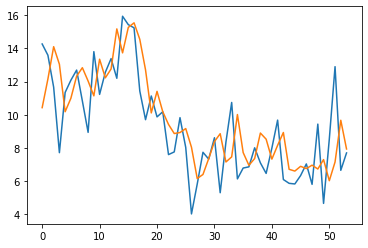

In [17]:
plt.plot(np.arange(len(y_true1)), y_true1)
plt.plot(np.arange(len(y_pred1)), y_pred1)
plt.show()

In [18]:
model2 = XGBRegressor(**params2)
model2.fit(X_train.values, y_train2.values)
y_pred2 = model2.predict(X_test.values)
mse2 = mean_squared_error(y_true2, y_pred2)
mae2 = mean_absolute_error(y_true2, y_pred2)
print("MSE: {}".format(mse2))
print("MAE: {}".format(mae2))

MSE: 11.33449103949407
MAE: 2.581195906543227


/home/rwanner/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


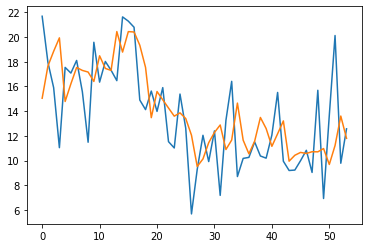

In [19]:
plt.plot(np.arange(len(y_true2)), y_true2)
plt.plot(np.arange(len(y_pred2)), y_pred2)
plt.show()

In [20]:
#Comparison with simple Ridge model
ridge = Ridge(alpha=100)
ridge.fit(X_train.values, y_train1.values)
preds = ridge.predict(X_test.values)
mse = mean_squared_error(y_true1, preds)
mae = mean_absolute_error(y_true1, preds)
print("MSE: {}".format(mse))
print("MAE: {}".format(mae))

MSE: 4.4786203249336545
MAE: 1.6864500719372142


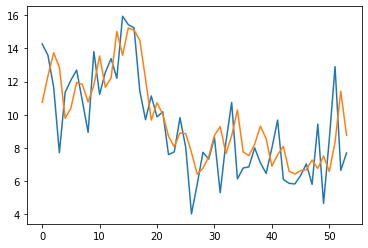

In [21]:
plt.plot(np.arange(len(y_true1)), y_true1)
plt.plot(np.arange(len(preds)), preds)
plt.show()

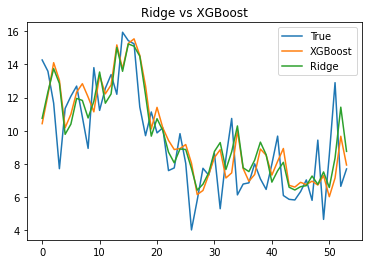

In [22]:
plt.plot(np.arange(len(y_true1)), y_true1)
plt.plot(np.arange(len(y_pred1)), y_pred1)
plt.plot(np.arange(len(preds)), preds)
plt.title("Ridge vs XGBoost")
plt.legend(['True', 'XGBoost', 'Ridge'])
plt.show()